C:\Users\hp\AppData\Local\Temp\ipykernel_23876\2870851437.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(data_counts.keys()), y=list(data_counts.values()), palette='viridis')


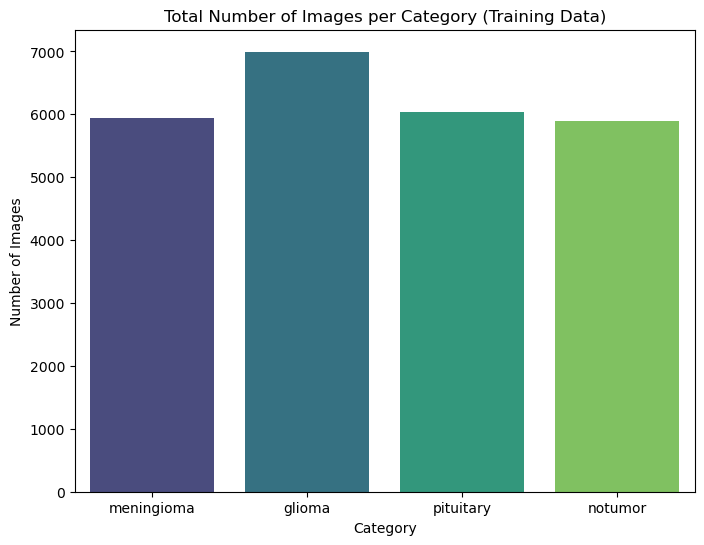

Found 19883 images belonging to 4 classes.
Found 4969 images belonging to 4 classes.
Class Indices: {'Glioma': 0, 'Meningioma': 1, 'NoTumor': 2, 'Pituitary': 3}
Class Weights: {0: 0.8882684060042888, 1: 1.0469144903117102, 2: 1.0542417815482503, 3: 1.0304208126036485}


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,600,964 (13.74 MB)

 Trainable params: 3,600,964 (13.74 MB)

 Non-trainable params: 0 (0.00 B)

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Paths for the dataset
train_dir = r"E:\MTech\S1\personal\PERSONAL\Brain\newdataset\TumourClassificationImages\Train"
test_dir = r"E:\MTech\S1\personal\PERSONAL\Brain\newdataset\TumourClassificationImages\Test"
categories = ['meningioma', 'glioma', 'pituitary', 'notumor']

# Plot category distribution in the training dataset
data_counts = {}
for category in categories:
    category_dir = os.path.join(train_dir, category)
    data_counts[category] = len(os.listdir(category_dir))

plt.figure(figsize=(8, 6))
sns.barplot(x=list(data_counts.keys()), y=list(data_counts.values()), palette='viridis')
plt.title("Total Number of Images per Category (Training Data)")
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.show()

# Image augmentation and data generators
img_size = (150, 150)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Get class indices and compute class weights
class_indices = train_generator.class_indices
print("Class Indices:", class_indices)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



In [2]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=35,
    validation_data=val_generator,
    class_weight=class_weights,
    callbacks=[early_stopping, lr_scheduler]
)


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/35
622/622 ━━━━━━━━━━━━━━━━━━━━ 407s 652ms/step - accuracy: 0.5210 - loss: 1.0455 - val_accuracy: 0.7480 - val_loss: 0.6315 - learning_rate: 0.0010
Epoch 2/35
622/622 ━━━━━━━━━━━━━━━━━━━━ 201s 322ms/step - accuracy: 0.7564 - loss: 0.6144 - val_accuracy: 0.8299 - val_loss: 0.4232 - learning_rate: 0.0010
Epoch 3/35
622/622 ━━━━━━━━━━━━━━━━━━━━ 221s 355ms/step - accuracy: 0.8316 - loss: 0.4370 - val_accuracy: 0.8887 - val_loss: 0.3080 - learning_rate: 0.0010
Epoch 4/35
622/622 ━━━━━━━━━━━━━━━━━━━━ 213s 343ms/step - accuracy: 0.8746 - loss: 0.3293 - val_accuracy: 0.9199 - val_loss: 0.2168 - learning_rate: 0.0010
Epoch 5/35
622/622 ━━━━━━━━━━━━━━━━━━━━ 196s 315ms/step - accuracy: 0.9129 - loss: 0.2366 - val_accuracy: 0.9360 - val_loss: 0.1834 - learning_rate: 0.0010
Epoch 6/35
622/622 ━━━━━━━━━━━━━━━━━━━━ 197s 317ms/step - accuracy: 0.9257 - loss: 0.2107 - val_accuracy: 0.9324 - val_loss: 0.1883 - learning_rate: 0.0010
Epoch 7/35
622/622 ━━━━━━━━━━━━━━━━━━━━ 192s 308ms/step - accura

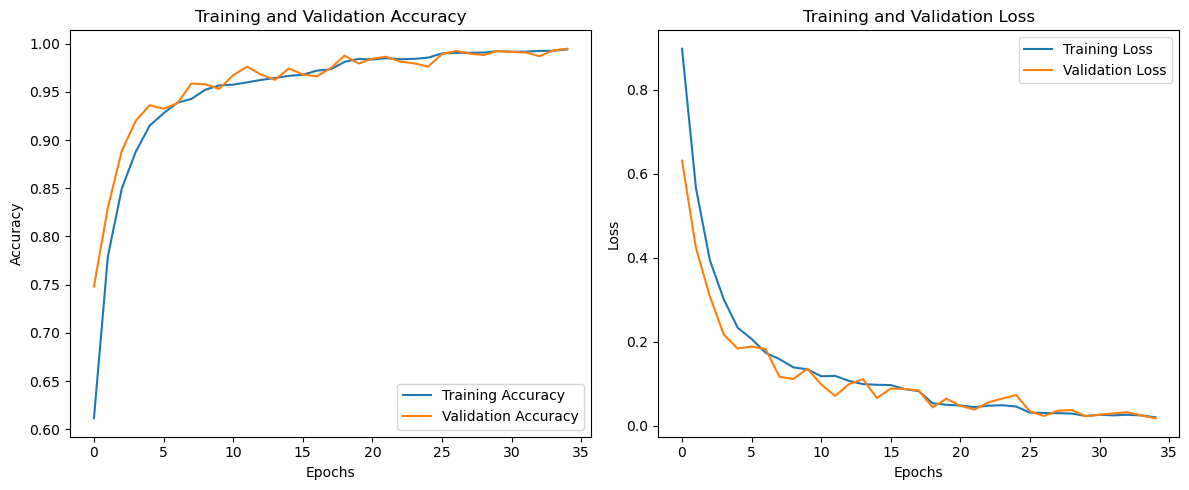

Model saved to tumor_classification_model.h5


In [5]:
# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model
model_path = 'tumor_classification_model.h5'
model.save(model_path)
print(f"Model saved to {model_path}")



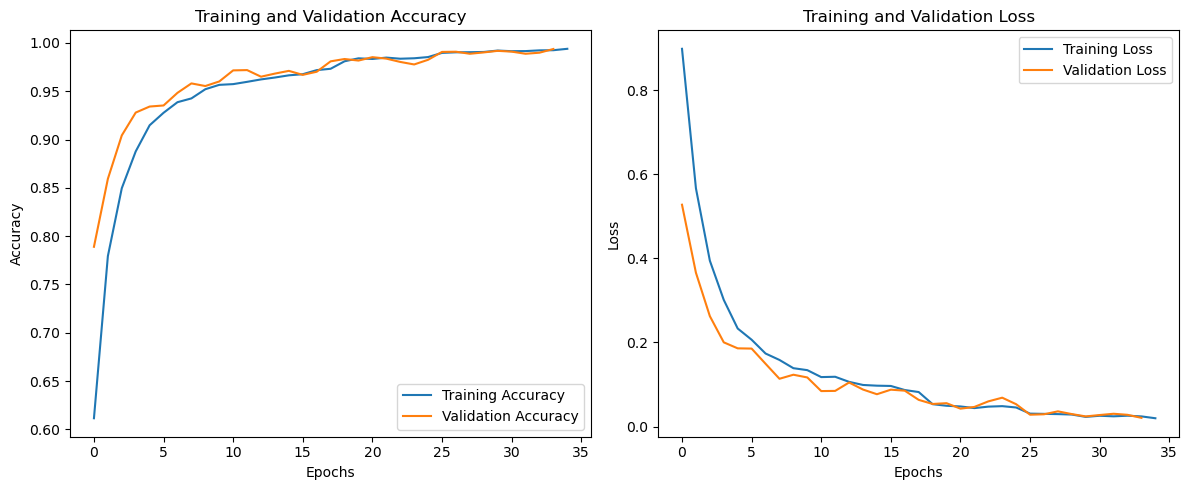

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def smooth_curve(data, window_size=2):
    """
    Smooths the curve using a moving average with a specified window size.
    """
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Plot training history
plt.figure(figsize=(12, 5))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Apply smoothing to validation accuracy
smoothed_val_accuracy = smooth_curve(history.history['val_accuracy'])
plt.plot(np.arange(len(smoothed_val_accuracy)), smoothed_val_accuracy, label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')

# Apply smoothing to validation loss
smoothed_val_loss = smooth_curve(history.history['val_loss'])
plt.plot(np.arange(len(smoothed_val_loss)), smoothed_val_loss, label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Found 10599 images belonging to 4 classes.
332/332 ━━━━━━━━━━━━━━━━━━━━ 85s 256ms/step - accuracy: 0.9918 - loss: 0.0245
Test Loss: 0.02345236949622631
Test Accuracy: 0.9923577904701233
332/332 ━━━━━━━━━━━━━━━━━━━━ 61s 181ms/step
Confusion Matrix
[[2877   18    2    7]
 [   8 2568    2   13]
 [   1   11 2554    1]
 [   0   17    0 2520]]
Classification Report
              precision    recall  f1-score   support

      Glioma       1.00      0.99      0.99      2904
  Meningioma       0.98      0.99      0.99      2591
     NoTumor       1.00      0.99      1.00      2567
   Pituitary       0.99      0.99      0.99      2537

    accuracy                           0.99     10599
   macro avg       0.99      0.99      0.99     10599
weighted avg       0.99      0.99      0.99     10599



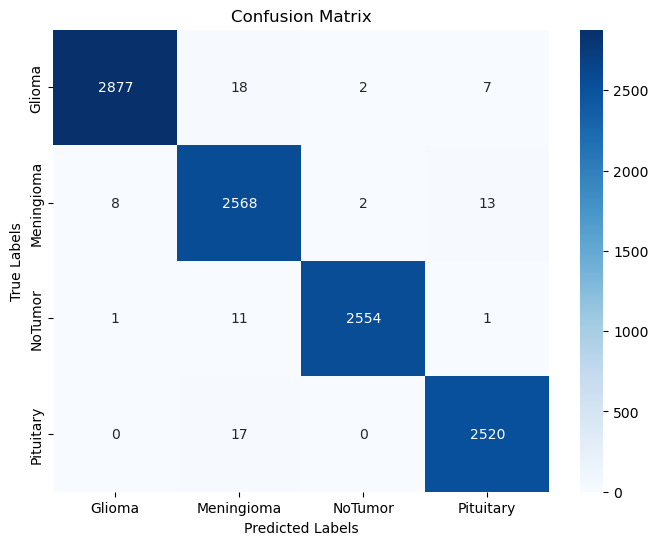

In [7]:
# Evaluate on the test dataset
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Generate confusion matrix and classification report
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

print("Confusion Matrix")
cm = confusion_matrix(test_generator.classes, predicted_classes)
print(cm)

print("Classification Report")
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, predicted_classes, target_names=target_names))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix

# Training confusion matrix
train_predictions = model.predict(train_generator)
train_predicted_classes = np.argmax(train_predictions, axis=1)

train_cm = confusion_matrix(train_generator.classes, train_predicted_classes)
print("Training Confusion Matrix:")
print(train_cm)

# Test confusion matrix
test_predictions = model.predict(test_generator)
test_predicted_classes = np.argmax(test_predictions, axis=1)

test_cm = confusion_matrix(test_generator.classes, test_predicted_classes)
print("Test Confusion Matrix:")
print(test_cm)


622/622 ━━━━━━━━━━━━━━━━━━━━ 113s 181ms/step
Training Confusion Matrix:
[[1621 1310 1330 1335]
 [1319 1170 1131 1128]
 [1292 1157 1054 1212]
 [1356 1112 1195 1161]]
332/332 ━━━━━━━━━━━━━━━━━━━━ 60s 180ms/step
Test Confusion Matrix:
[[2876   15    0   13]
 [  10 2564    3   14]
 [   1   10 2553    3]
 [   0   12    1 2524]]


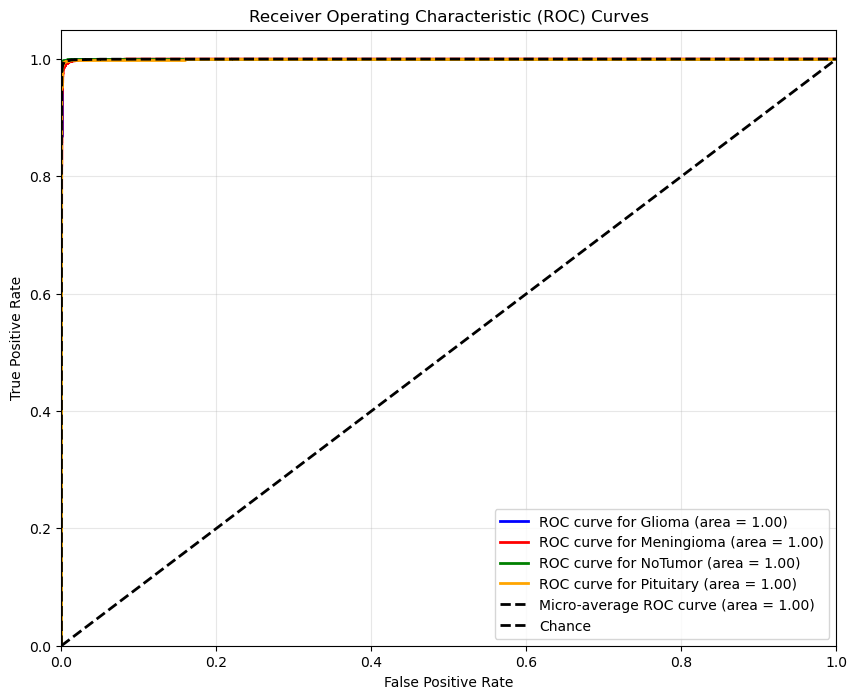

In [9]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the labels for multi-class ROC
true_labels = label_binarize(test_generator.classes, classes=range(len(target_names)))
n_classes = true_labels.shape[1]

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(true_labels.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

colors = cycle(['blue', 'red', 'green', 'orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve for {target_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot(fpr["micro"], tpr["micro"], linestyle='--', color='black', lw=2,
         label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})')

# Diagonal line for random chance
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


Found 10599 images belonging to 4 classes.
Found 24852 images belonging to 4 classes.


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


332/332 ━━━━━━━━━━━━━━━━━━━━ 24s 73ms/step - accuracy: 0.9799 - loss: 0.0622
Test Loss: 0.037962015718221664
Test Accuracy: 0.9883008003234863
777/777 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.9834 - loss: 0.0471
Train Loss: 0.025169331580400467
Train Accuracy: 0.9912280440330505
332/332 ━━━━━━━━━━━━━━━━━━━━ 25s 74ms/step
Confusion Matrix (Test Data)
[[2827   22   22   33]
 [   2 2554    8   27]
 [   0    1 2564    2]
 [   0    3    4 2530]]
Classification Report (Test Data)
              precision    recall  f1-score   support

      Glioma       1.00      0.97      0.99      2904
  Meningioma       0.99      0.99      0.99      2591
     NoTumor       0.99      1.00      0.99      2567
   Pituitary       0.98      1.00      0.99      2537

    accuracy                           0.99     10599
   macro avg       0.99      0.99      0.99     10599
weighted avg       0.99      0.99      0.99     10599



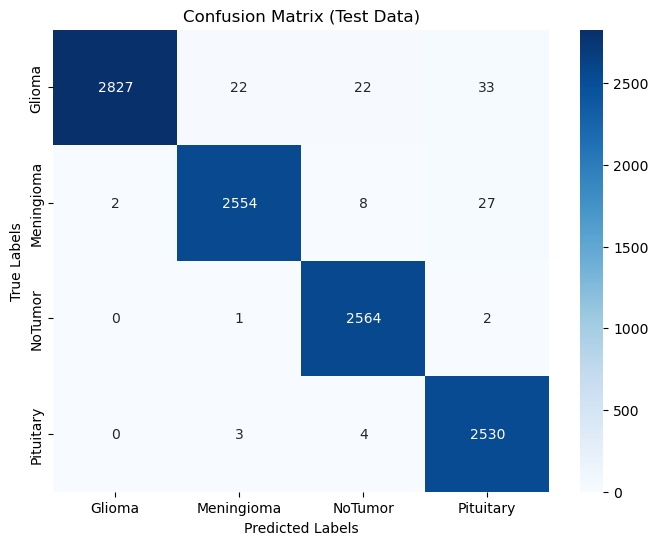

777/777 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step
Confusion Matrix (Train Data)
[[6838   57   40   60]
 [   0 5884   16   35]
 [   0    1 5892    0]
 [   0    5    4 6020]]
Classification Report (Train Data)
              precision    recall  f1-score   support

      Glioma       1.00      0.98      0.99      6995
  Meningioma       0.99      0.99      0.99      5935
     NoTumor       0.99      1.00      0.99      5893
   Pituitary       0.98      1.00      0.99      6029

    accuracy                           0.99     24852
   macro avg       0.99      0.99      0.99     24852
weighted avg       0.99      0.99      0.99     24852



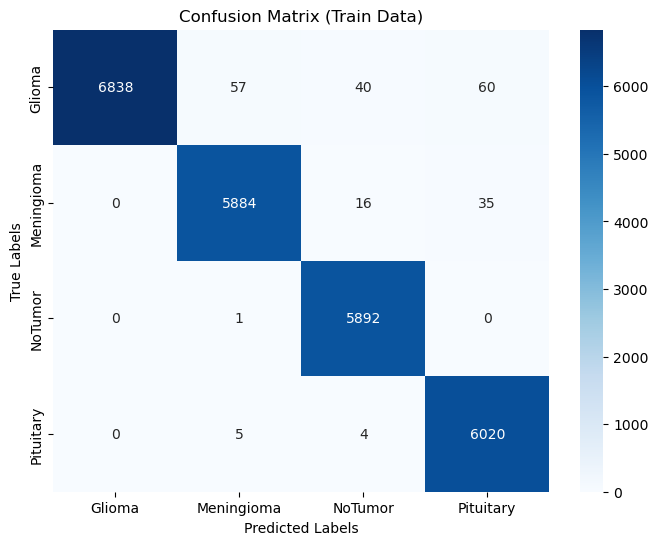

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to the test and train data
test_dir = r"E:\MTech\S1\personal\PERSONAL\Brain\newdataset\TumourClassificationImages\Test"
train_dir = r"E:\MTech\S1\personal\PERSONAL\Brain\newdataset\TumourClassificationImages\Train"

# Image size and batch size
img_size = (150, 150)
batch_size = 32

# Create a data generator for rescaling
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Test data generator
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Do not shuffle for confusion matrix
)

# Train data generator
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Do not shuffle for confusion matrix
)

# Evaluate on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Evaluate on the train dataset
train_loss, train_accuracy = model.evaluate(train_generator)
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}")

# Generate confusion matrix and classification report for test data
test_predictions = model.predict(test_generator)
test_predicted_classes = np.argmax(test_predictions, axis=1)

print("Confusion Matrix (Test Data)")
cm_test = confusion_matrix(test_generator.classes, test_predicted_classes)
print(cm_test)

print("Classification Report (Test Data)")
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, test_predicted_classes, target_names=target_names))

# Plot the confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix (Test Data)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate confusion matrix and classification report for train data
train_predictions = model.predict(train_generator)
train_predicted_classes = np.argmax(train_predictions, axis=1)

print("Confusion Matrix (Train Data)")
cm_train = confusion_matrix(train_generator.classes, train_predicted_classes)
print(cm_train)

print("Classification Report (Train Data)")
print(classification_report(train_generator.classes, train_predicted_classes, target_names=target_names))

# Plot the confusion matrix for train data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix (Train Data)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


332/332 ━━━━━━━━━━━━━━━━━━━━ 25s 77ms/step


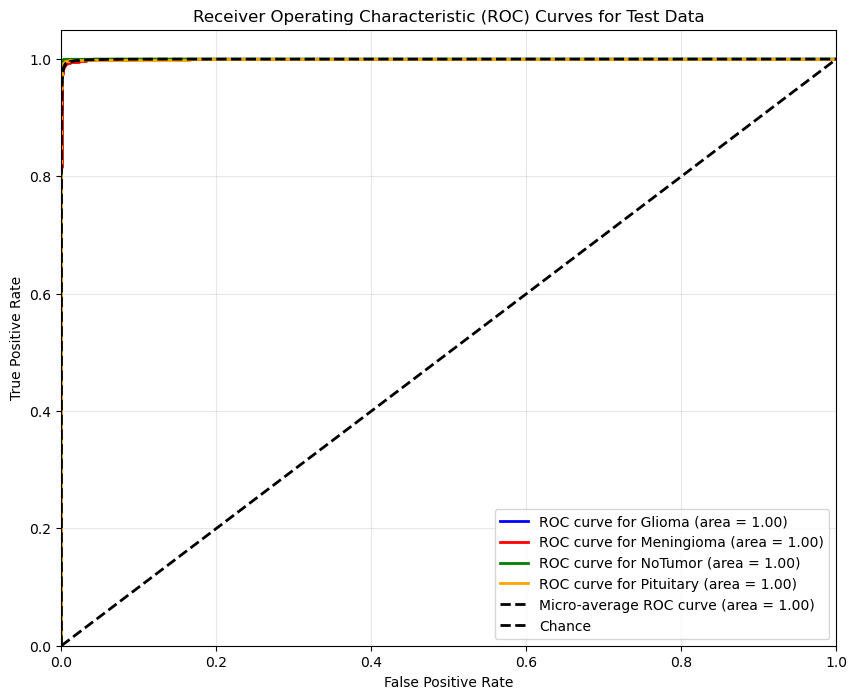

777/777 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step


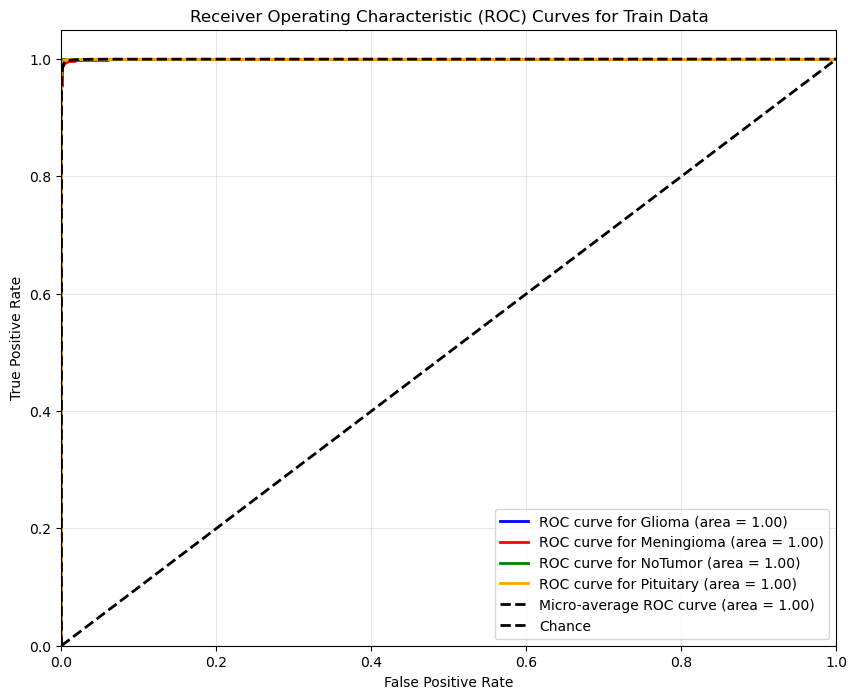

In [11]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to the test and train data
test_dir = r"E:\MTech\S1\personal\PERSONAL\Brain\newdataset\TumourClassificationImages\Test"
train_dir = r"E:\MTech\S1\personal\PERSONAL\Brain\newdataset\TumourClassificationImages\Train"

def compute_roc_curve_and_plot(generator, dataset_name):
    # Binarize the labels for ROC
    true_labels = label_binarize(generator.classes, classes=range(len(target_names)))
    n_classes = true_labels.shape[1]
    
    # Predict the probabilities for each class
    predictions = model.predict(generator)
    
    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(true_labels.ravel(), predictions.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot all ROC curves
    plt.figure(figsize=(10, 8))
    colors = cycle(['blue', 'red', 'green', 'orange'])
    
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve for {target_names[i]} (area = {roc_auc[i]:.2f})')

    plt.plot(fpr["micro"], tpr["micro"], linestyle='--', color='black', lw=2,
             label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})')

    # Diagonal line for random chance
    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curves for {dataset_name} Data')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

# Compute ROC for test data
compute_roc_curve_and_plot(test_generator, "Test")

# Compute ROC for train data
compute_roc_curve_and_plot(train_generator, "Train")


Found 4969 images belonging to 4 classes.


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


156/156 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.9803 - loss: 0.0593
Validation Loss: 0.03488483279943466
Validation Accuracy: 0.9891326427459717
156/156 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step


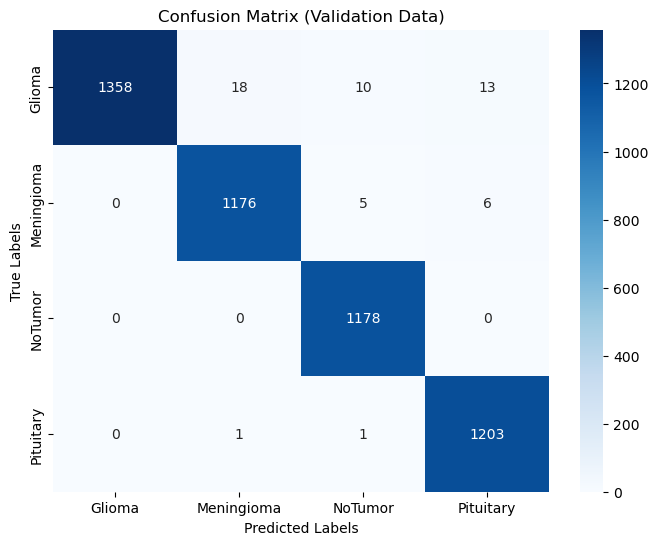

Classification Report (Validation Data)
              precision    recall  f1-score   support

      Glioma       1.00      0.97      0.99      1399
  Meningioma       0.98      0.99      0.99      1187
     NoTumor       0.99      1.00      0.99      1178
   Pituitary       0.98      1.00      0.99      1205

    accuracy                           0.99      4969
   macro avg       0.99      0.99      0.99      4969
weighted avg       0.99      0.99      0.99      4969



In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = r"E:\MTech\S1\personal\PERSONAL\Brain\newdataset\TumourClassificationImages\Train"

# Image size and batch size
img_size = (150, 150)
batch_size = 32

# Image data generator with validation split
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2  # Use 20% of the training data as validation
)

# Validation data generator
val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Do not shuffle for confusion matrix
)

# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Predict on the validation dataset
val_predictions = model.predict(val_generator)
val_predicted_classes = np.argmax(val_predictions, axis=1)

# Generate confusion matrix for validation data
cm_val = confusion_matrix(val_generator.classes, val_predicted_classes)

# Get the class names
target_names = list(val_generator.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix (Validation Data)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the classification report
print("Classification Report (Validation Data)")
print(classification_report(val_generator.classes, val_predicted_classes, target_names=target_names))
